[Linear discriminant analysis, two-classes](http://research.cs.tamu.edu/prism/lectures/pr/pr_l10.pdf)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#Generate a 2D dataset
X_1 = np.array([[4, 2],[2, 4], [2, 3],[3, 6],[4, 4]])
X_2 = np.array([[9,10],[6,8],[9,5],[8,7],[10,8]])

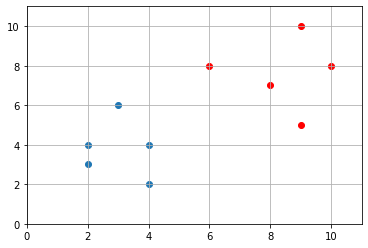

In [3]:
#plot each data point on the feature space
plt.scatter(X_1[:,0],X_1[:,1])
plt.scatter(X_2[:,0],X_2[:,1], color = 'r')
plt.xlim([0,11])
plt.ylim([0,11])
plt.grid('True')
plt.show()

In [0]:
#Compute mean vectors for each class
m1 = np.array((np.mean(X_1[:,0]),np.mean(X_1[:,1])))
m2 = np.array((np.mean(X_2[:,0]),np.mean(X_2[:,1])))

In [15]:
#Compute covariance matrix for each class
S1 = np.cov(np.mat(X_1).T)
S2 = np.cov(np.mat(X_2).T)
#Compute within-class scatter
Sw = S1 + S2
Sw

array([[ 3.3, -0.3],
       [-0.3,  5.5]])

In [6]:
#Compute between-class scatter
Sb = np.mat(m1-m2).T*np.mat(m1-m2)
Sb

matrix([[29.16, 20.52],
        [20.52, 14.44]])

In [0]:
#Compute the Fisher criterion
invSw = np.linalg.inv(Sw)
invSw_by_Sb = invSw*Sb

#Compute the eigenvectors 
[V,D] = np.linalg.eig(invSw_by_Sb)

In [17]:
#Select the specific direction for the projection
print('eigen-vector ',np.mat(D[:,0]).T, ' with eigen-value ',V[0])
print('eigen-vector ',np.mat(D[:,1]).T, ' with eigen-value ',V[1])
W = V[0]

eigen-vector  [[0.90878558 0.41726342]]  with eigen-value  12.20066445182724
eigen-vector  [[-0.57549341  0.81780642]]  with eigen-value  0.0


In [0]:
#Project each point in the set
Y1 = np.mat(X_1)*np.mat(D[:,0])
Y2 = np.mat(X_2)*np.mat(D[:,0])

In [0]:
def gaussian(x, mu, sig): #gaussian function
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [0]:
#With the new projected data, generate a representation of the distribution 
A = gaussian(np.linspace(0,15,50), np.mean(Y1), np.std(Y1))
B = gaussian(np.linspace(0,15,50), np.mean(Y2), np.std(Y2))

(0, 15)

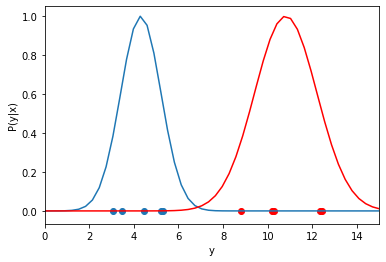

In [19]:
#Plot the new distributions
plt.plot(np.linspace(0,15,50),A)
plt.plot(np.linspace(0,15,50),B, color='r')
plt.scatter(np.array(Y1[:]),np.zeros(len(Y1)))
plt.scatter(np.array(Y2[:]),np.zeros(len(Y2)), color= 'r')
plt.xlabel('y')
plt.ylabel('P(y|x)')
plt.xlim([0,15])